In [38]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 660.6 kB/s eta 0:03:10
   ---------------------------------------- 0.0/124.9 MB 660.6 kB/s eta 0:03:10
   ---------------------------------------- 0.1/124.9 MB 409.6 kB/s eta 0:05:05
   ---------------------------------------- 0.1/124.9 MB 328.6 kB/s eta 0:06:20
   ---------------------------------------- 0.1/124.9 MB 504.4 kB/s eta 0:04:08
   ---------------------------------------- 0.1/124.9 MB 481.4 kB/s eta 0:04:20
   ---------------------------------------- 0.2/124.9 MB 583.1 kB/s eta 0:03:34
   ---------------------------------------- 0.2/124.9 MB 565.6 kB/s eta 0:03:41
   ---------------------------------------- 0.3/124.9 MB 655.8 kB/s eta 0:03:11
   ---------------------------------------- 0.4/124.9 MB 742.3 kB/s eta 0:02:48
   ---------------------------------------- 0.4/124.9 MB 7


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\soham\Downloads\venv\myenv\Scripts\python.exe -m pip install --upgrade pip


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset
file_path = r'C:\Users\soham\Downloads\Customer Churn.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print('Dataset size:', df.shape)


Dataset size: (10000, 14)


In [5]:
# Check for missing values
missing_values = df.isnull().sum()

# Display missing values
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [6]:
# Check for duplicate rows in the dataset
duplicate_rows = df[df.duplicated()]

# Count the number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

# Display duplicate rows and the count
num_duplicates

0

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# Display statistical summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [9]:
df.nunique()


RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
# Identifying numerical and non-numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", non_numerical_columns)

Numerical Columns: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Categorical Columns: ['Surname', 'Geography', 'Gender']


C:\Users\soham\AppData\Local\Temp\ipykernel_60056\2483018898.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=exited_counts.index, y=exited_counts, ax=axes[0], palette='Set2')


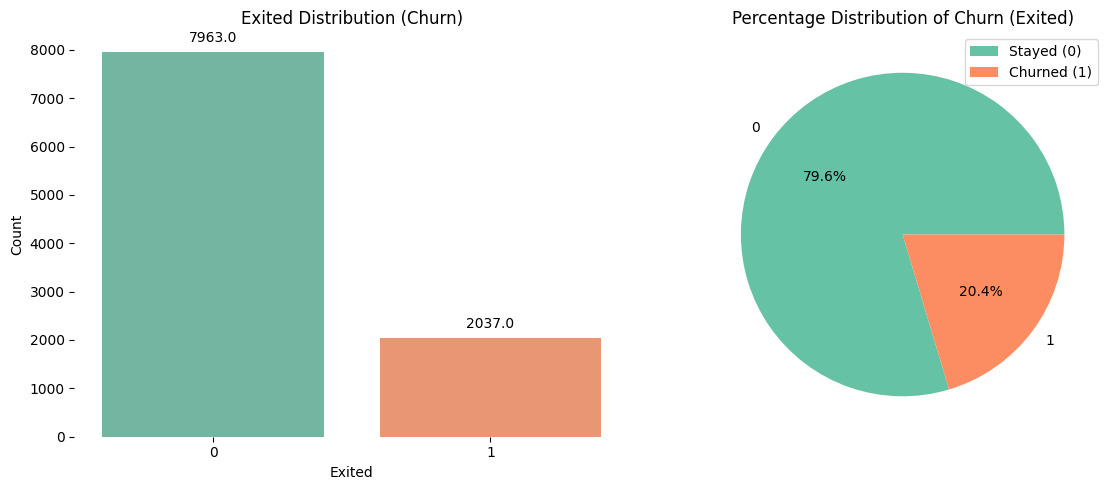

In [11]:
# Create subplots for Exited feature
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
exited_counts = df['Exited'].value_counts()
sns.barplot(x=exited_counts.index, y=exited_counts, ax=axes[0], palette='Set2')
axes[0].set_title('Exited Distribution (Churn)')
axes[0].set_ylabel('Count')

for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')
sns.despine(left=True, bottom=True) 
    
exited_percentage = df['Exited'].value_counts(normalize=True) * 100
axes[1].pie(exited_percentage, labels=exited_percentage.index, autopct='%1.1f%%', 
            colors=sns.color_palette('Set2'))
axes[1].set_title('Percentage Distribution of Churn (Exited)')
plt.legend(['Stayed (0)', 'Churned (1)'])
plt.tight_layout()
plt.show()

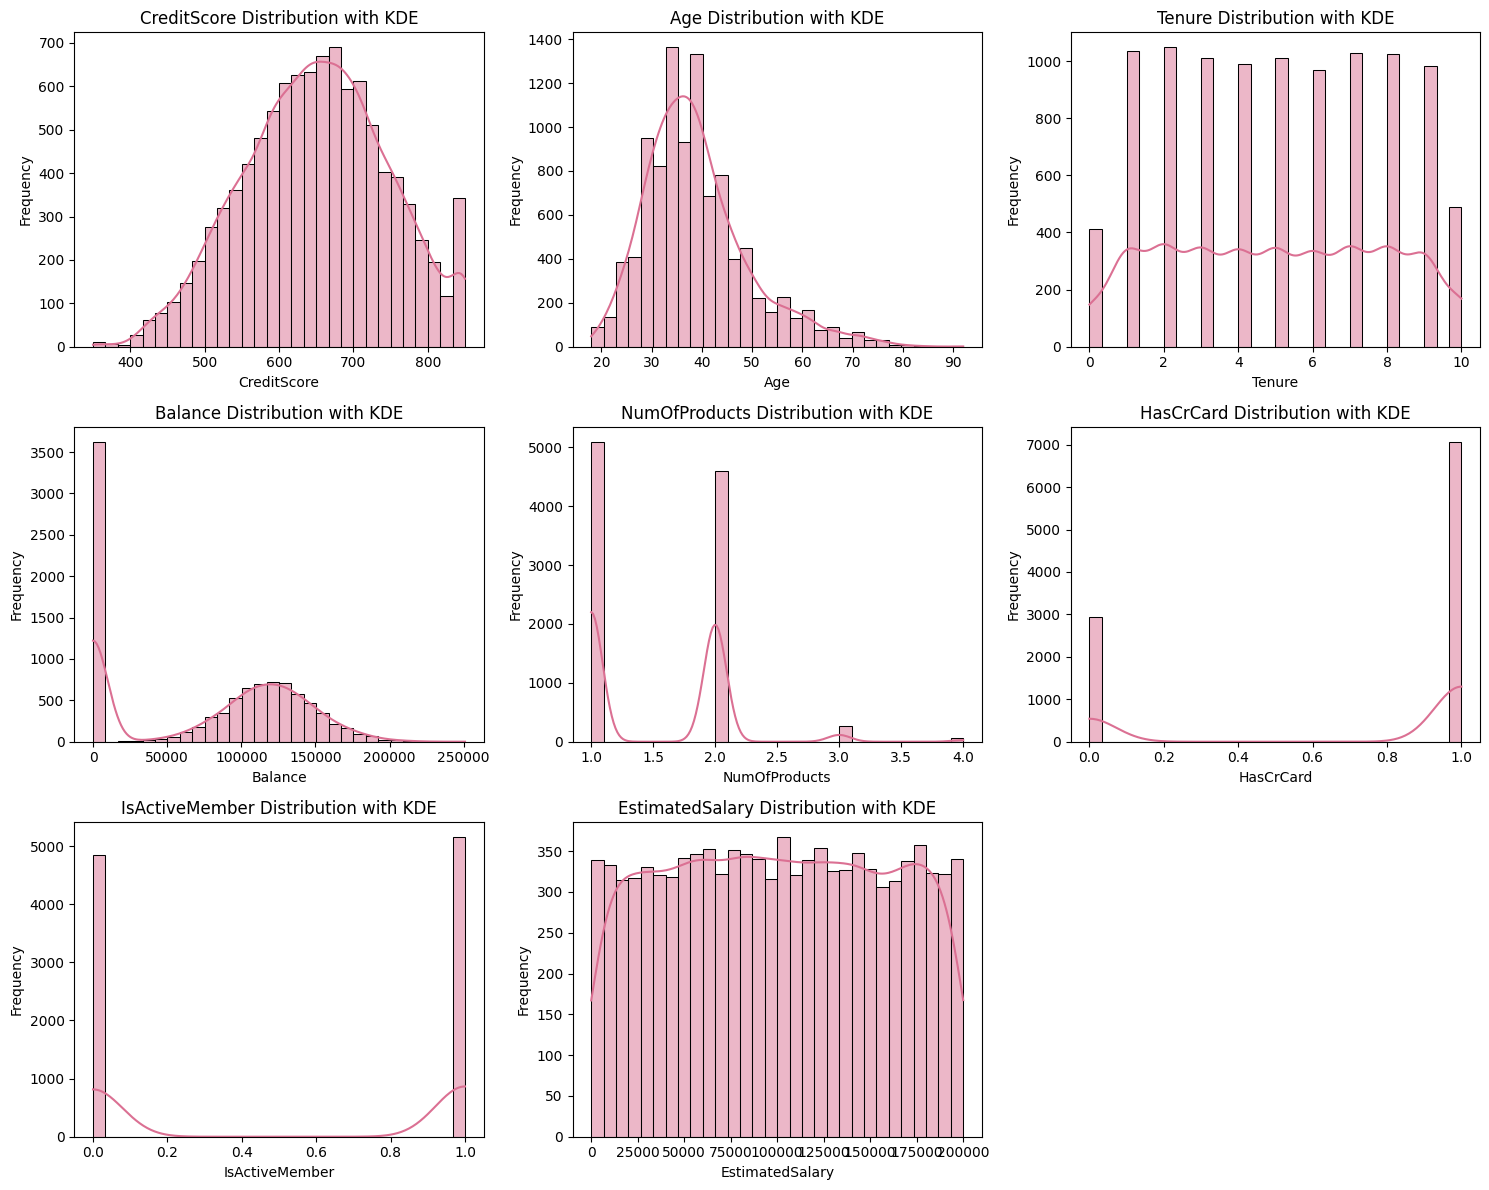

In [12]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, columns):
    plt.figure(figsize=(15, 12))  # Adjust figure size to fit all plots
    
    for i, column in enumerate(columns, 1):
        plt.subplot(3, 3, i)  # Create a 3x3 grid of subplots
        sns.histplot(data[column], kde=True, bins=30, color='palevioletred')
        plt.title(f'{column.replace("_", " ")} Distribution with KDE')
        plt.xlabel(column.replace('_', ' '))
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

columns_to_analyze = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

univariate_analysis(df, columns_to_analyze)


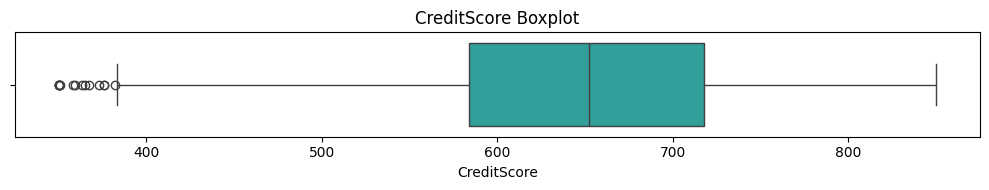


Summary Statistics for CreditScore:
 count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64


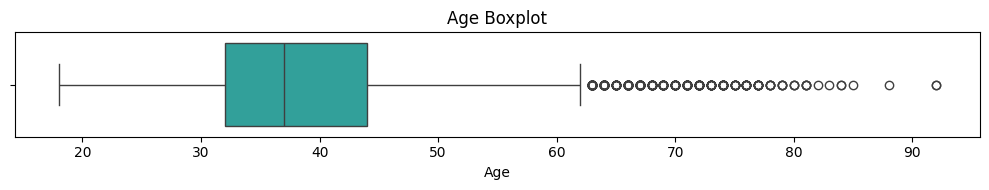


Summary Statistics for Age:
 count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64


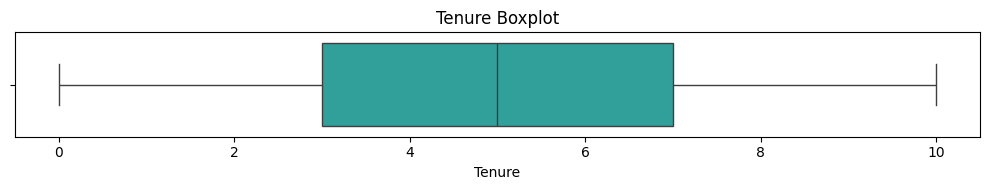


Summary Statistics for Tenure:
 count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64


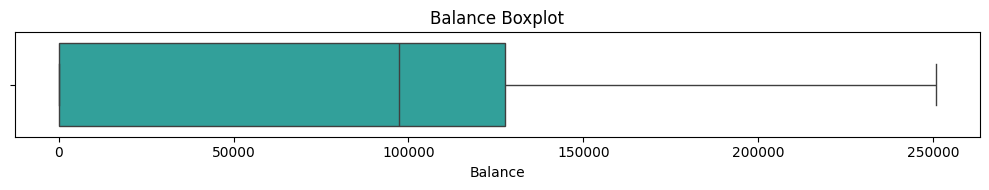


Summary Statistics for Balance:
 count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64


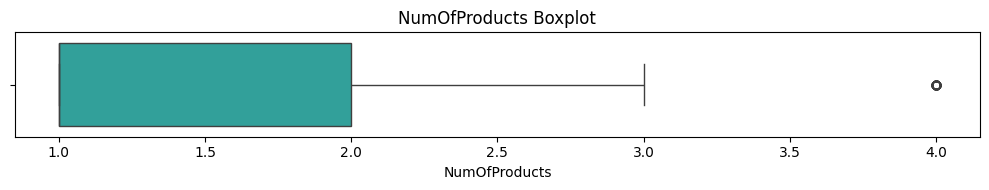


Summary Statistics for NumOfProducts:
 count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumOfProducts, dtype: float64


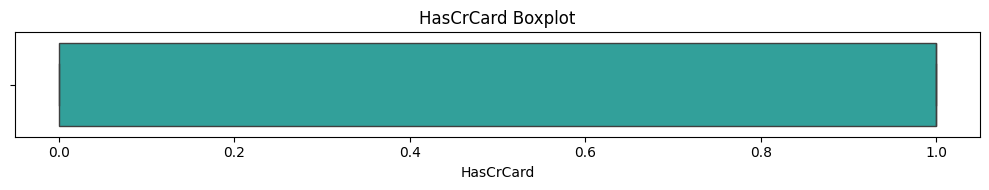


Summary Statistics for HasCrCard:
 count    10000.00000
mean         0.70550
std          0.45584
min          0.00000
25%          0.00000
50%          1.00000
75%          1.00000
max          1.00000
Name: HasCrCard, dtype: float64


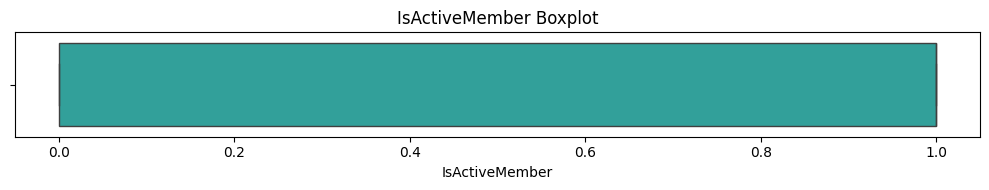


Summary Statistics for IsActiveMember:
 count    10000.000000
mean         0.515100
std          0.499797
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: IsActiveMember, dtype: float64


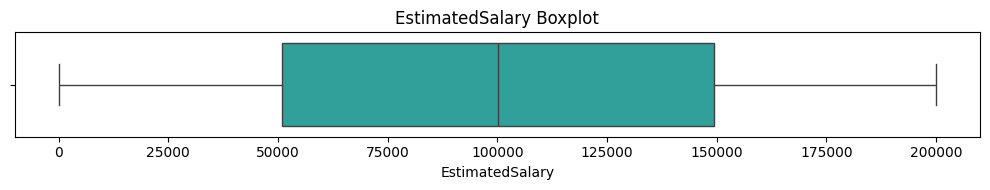


Summary Statistics for EstimatedSalary:
 count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64


In [13]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, column, title):
    plt.figure(figsize=(10, 2))
    
    sns.boxplot(x=data[column], color='lightseagreen')
    plt.title(f'{title} Boxplot')
    
    plt.tight_layout()
    plt.show()

    print(f'\nSummary Statistics for {title}:\n', data[column].describe())

columns_to_analyze = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

for column in columns_to_analyze:
    univariate_analysis(df, column, column.replace('_', ' '))

In [14]:
def plot_categorical_distribution(column_name, data=df):
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    sns.countplot(y=column_name, data=df, palette='Set2')  
    plt.title(f'Distribution of {column_name}')
    
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')
    
    sns.despine(left=True, bottom=True)
    
    plt.subplot(1, 2, 2)
    df[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=90, explode=[0.05]*df[column_name].nunique())
    plt.title(f'Percentage Distribution of {column_name}')
    plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()

C:\Users\soham\AppData\Local\Temp\ipykernel_60056\975968146.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=df, palette='Set2')


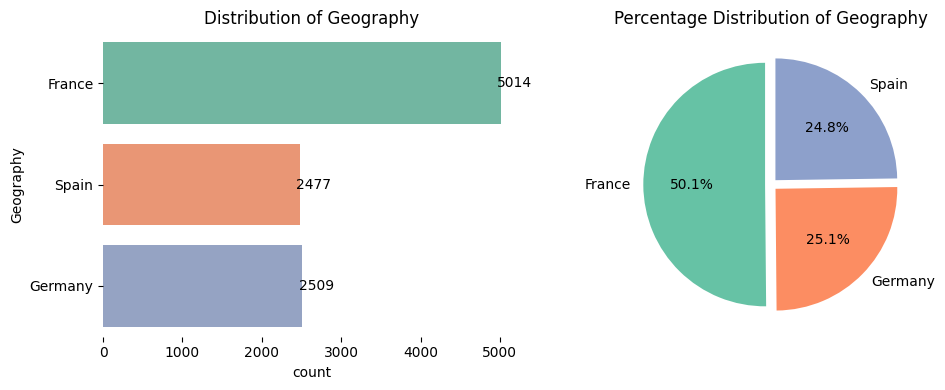

In [15]:
plot_categorical_distribution('Geography')


C:\Users\soham\AppData\Local\Temp\ipykernel_60056\975968146.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=df, palette='Set2')


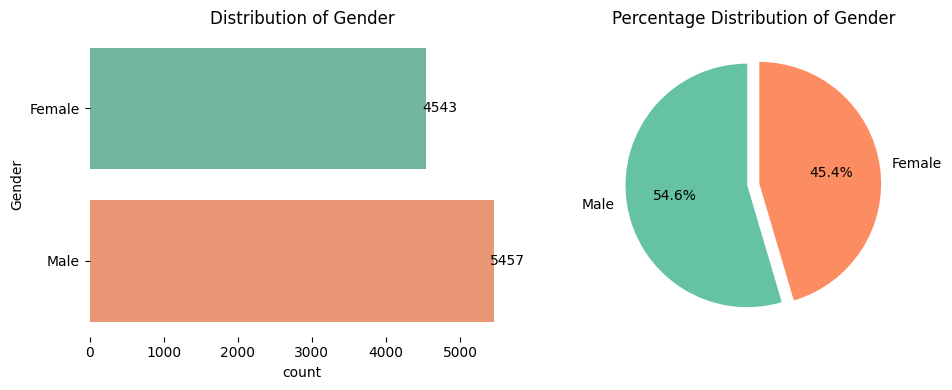

In [16]:
plot_categorical_distribution('Gender')


In [17]:
# Create a crosstab of Geography and Exited
contingency_table = pd.crosstab(df['Geography'], df['Exited'])

# Display the crosstab
print(contingency_table)

Exited        0    1
Geography           
France     4204  810
Germany    1695  814
Spain      2064  413


C:\Users\soham\Downloads\venv\myenv\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\soham\Downloads\venv\myenv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\soham\Downloads\venv\myenv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\soham\Downloads\venv\myenv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

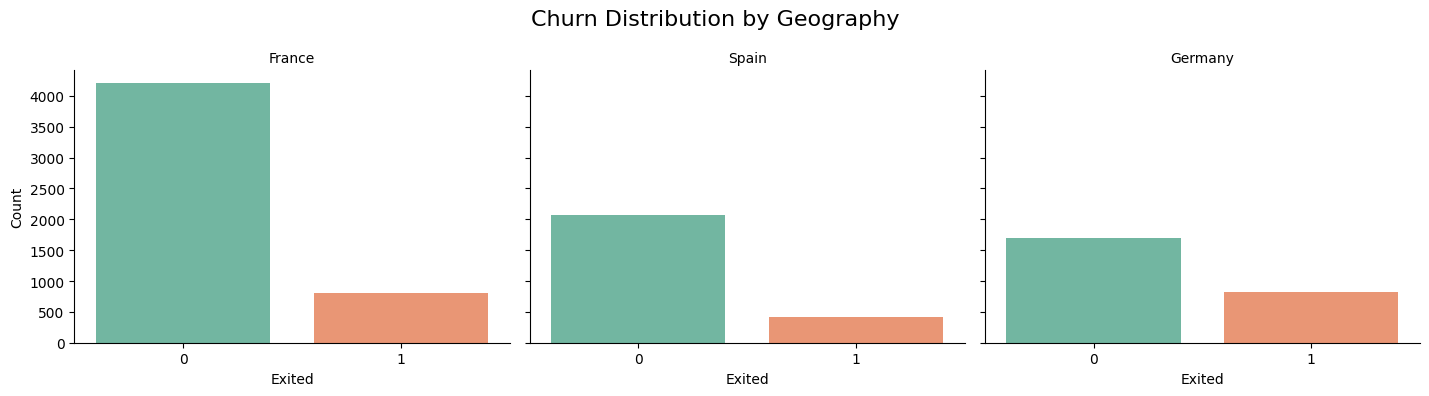

In [18]:
# Create a FacetGrid to visualize Geography by Exited
g = sns.FacetGrid(df, col='Geography', height=4, aspect=1.2)

g.map(sns.countplot, 'Exited', palette='Set2')
g.set_titles("{col_name}")
g.set_axis_labels("Exited", "Count")
g.fig.suptitle('Churn Distribution by Geography', fontsize=16)
plt.tight_layout()
plt.show()

In [19]:
# Create a crosstab of Gender and Exited
contingency_table = pd.crosstab(df['Gender'], df['Exited'])

# Display the crosstab
print(contingency_table)

Exited     0     1
Gender            
Female  3404  1139
Male    4559   898


C:\Users\soham\Downloads\venv\myenv\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\soham\Downloads\venv\myenv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\soham\Downloads\venv\myenv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


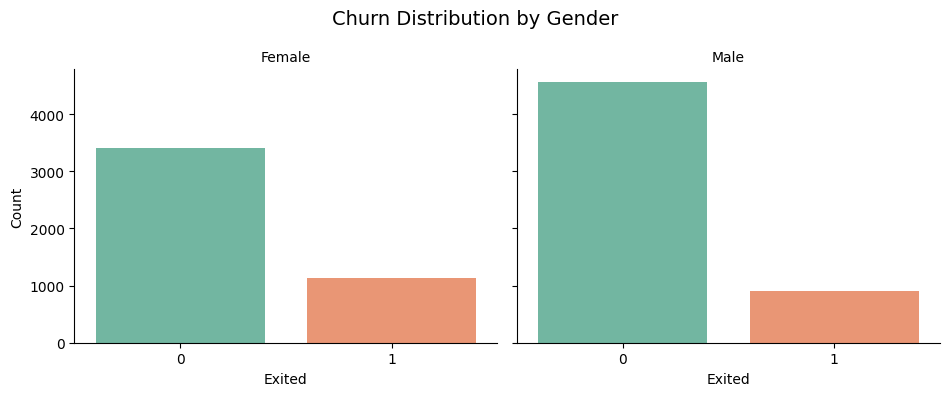

In [20]:
# Create a FacetGrid to visualize Gender by Exited
g = sns.FacetGrid(df, col='Gender', height=4, aspect=1.2)

g.map(sns.countplot, 'Exited', palette='Set2')
g.set_titles("{col_name}")
g.set_axis_labels("Exited", "Count")
g.fig.suptitle('Churn Distribution by Gender', fontsize=14)
plt.tight_layout()
plt.show()

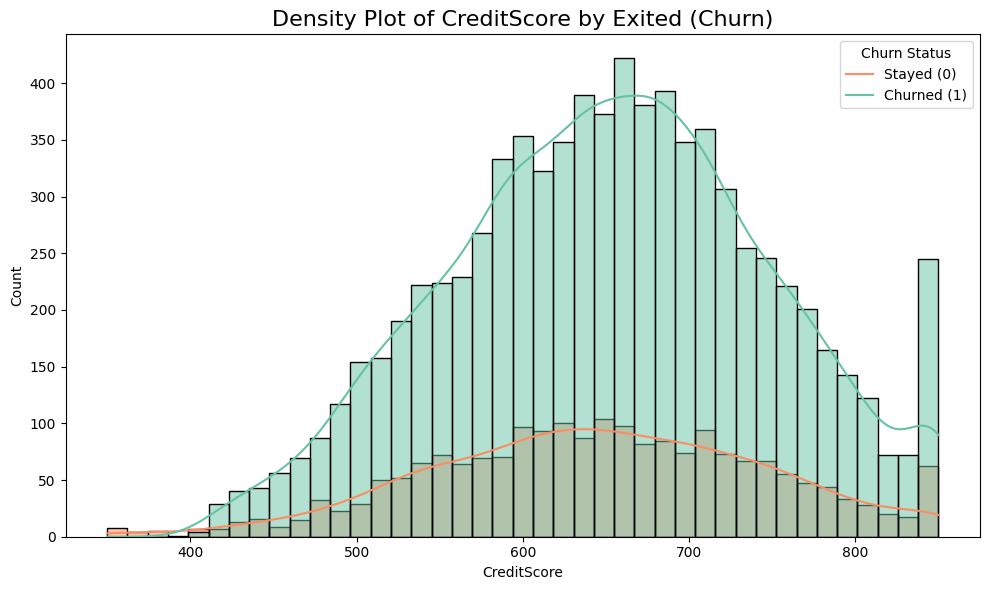

In [21]:
# Create a histplot for CreditScore by Exited
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='CreditScore', hue='Exited', kde=True, fill=True, palette='Set2')
plt.title('Density Plot of CreditScore by Exited (Churn)', fontsize=16)
plt.xlabel('CreditScore')
plt.ylabel('Count')
plt.legend(title='Churn Status', labels=['Stayed (0)', 'Churned (1)'])
plt.tight_layout()
plt.show()

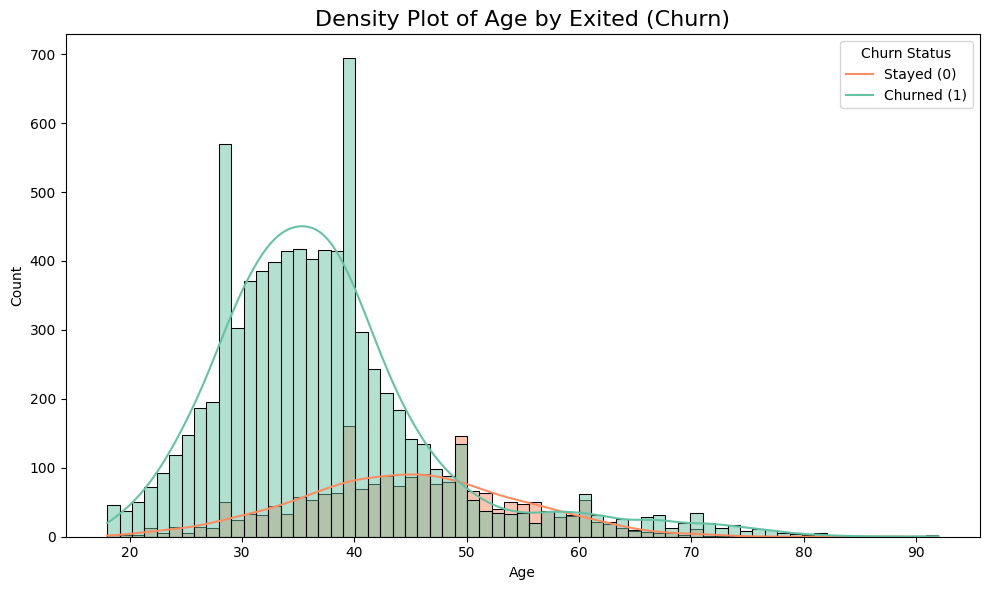

In [22]:
# Create a histplot for Age by Exited
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Exited', kde=True, fill=True, palette='Set2')
plt.title('Density Plot of Age by Exited (Churn)', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Churn Status', labels=['Stayed (0)', 'Churned (1)'])
plt.tight_layout()
plt.show()

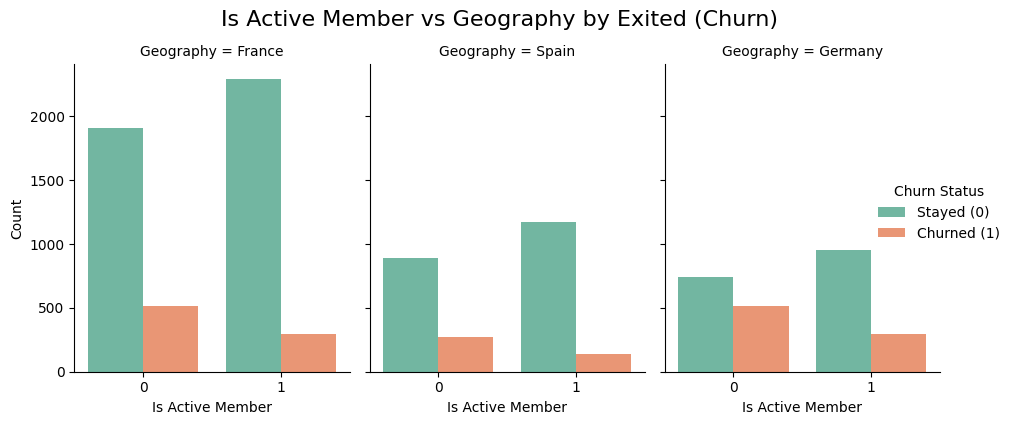

In [23]:
g = sns.catplot(
    data=df, 
    x='IsActiveMember', 
    hue='Exited', 
    col='Geography', 
    kind='count',
    palette='Set2',
    height=4, 
    aspect=0.8
)

g.fig.suptitle('Is Active Member vs Geography by Exited (Churn)', fontsize=16, y=1.05)
g.set_axis_labels('Is Active Member', 'Count')
g._legend.set_title('Churn Status')
new_labels = ['Stayed (0)', 'Churned (1)']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.show()


In [25]:
   # One-Hot Encoding for 'Geography'
df_encoded = pd.get_dummies(df, columns=['Geography'])

# Binary Encoding for 'Gender'
df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 0, 'Female': 1})

# Display the encoded dataframe
df_encoded.head() 

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,1,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,2,15647311,Hill,608,1,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,3,15619304,Onio,502,1,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,4,15701354,Boni,699,1,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,5,15737888,Mitchell,850,1,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [26]:
# Dropping the identifier columns that do not influence churn prediction
df_encoded = df_encoded.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Display the updated dataframe
df_encoded.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,1,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,1,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,1,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,1,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [27]:
# Get the unique value count for 'Exited'
Exited_unique_counts = df_encoded['Exited'].value_counts()

# Display the unique value count for Exited
Exited_unique_counts

Exited
0    7963
1    2037
Name: count, dtype: int64

In [30]:
# Separate the majority and minority classes
majority_class = df_encoded[df_encoded['Exited'] == 0]
minority_class = df_encoded[df_encoded['Exited'] == 1]

# Oversample the minority class
minority_oversampled = resample(minority_class,
                                replace=True, 
                                n_samples=len(majority_class),  
                                random_state=42)

# Combine the majority and oversampled minority class
df_encoded = pd.concat([majority_class, minority_oversampled])

In [31]:
# Check the new class distribution of Exited after oversampling
oversampled_Exited_distribution = df_encoded['Exited'].value_counts()

# Display the distribution
oversampled_Exited_distribution

Exited
0    7963
1    7963
Name: count, dtype: int64

C:\Users\soham\AppData\Local\Temp\ipykernel_60056\3612962388.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Exited', data=df_encoded, palette='tab10')


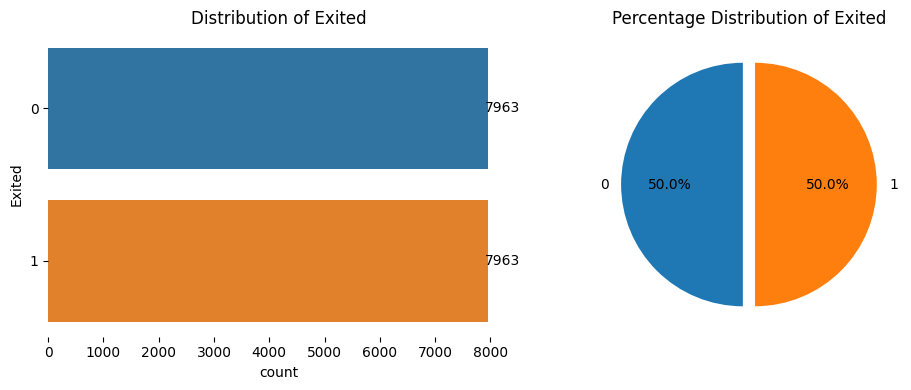

In [32]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(y='Exited', data=df_encoded, palette='tab10')  
plt.title('Distribution of Exited')

# Add count labels on top of bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')

sns.despine(left=True, bottom=True)  

plt.subplot(1, 2, 2)
df_encoded['Exited'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('tab10'), startangle=90, explode=[0.05]*df_encoded['Exited'].nunique())
plt.title('Percentage Distribution of Exited')
plt.ylabel('') 

plt.tight_layout()
plt.show()


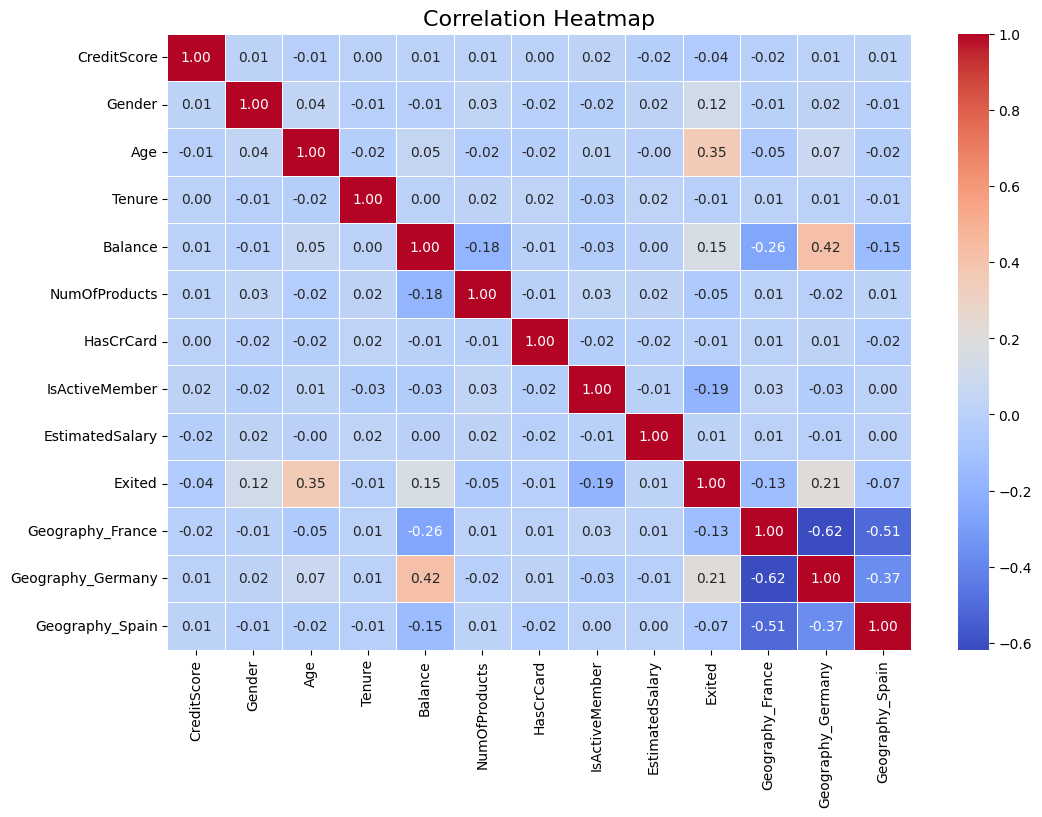

In [33]:
# Calculating the correlation matrix
corr_matrix = df_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [34]:
# Separate features and target
X = df_encoded.drop('Exited', axis=1)
y = df_encoded['Exited']

In [35]:
# Initialize StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-0.403730,1.023766,-0.013474,-1.362290,0.026901,-0.761785,-1.534358,1.084700,0.210684,-0.925766,-0.666735,1.825816
1,0.525949,1.023766,-0.202377,-1.362290,-1.338773,0.728838,-1.534358,-0.921913,-0.114849,1.080186,-0.666735,-0.547700
2,2.068603,1.023766,0.175428,-1.021026,0.706464,-0.761785,0.651738,1.084700,-0.371272,-0.925766,-0.666735,1.825816
3,1.782548,-0.976786,0.836586,0.685291,-1.338773,0.728838,0.651738,1.084700,-1.571785,1.080186,-0.666735,-0.547700
4,-1.496869,-0.976786,0.269879,-0.338499,0.975992,0.728838,-1.534358,1.084700,-0.443343,1.080186,-0.666735,-0.547700


In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [40]:
# Initialize models
svm_model = SVC()
log_reg_model = LogisticRegression(max_iter=1000)
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()
xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [41]:
# Train and evaluate models

# SVM
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Logistic Regression
log_reg_model.fit(X_train, y_train)
log_reg_predictions = log_reg_model.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)

# Decision Tree
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)

# Random Forest
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)

# XGBoost
xgboost_model.fit(X_train, y_train)
xgboost_predictions = xgboost_model.predict(X_test)
xgboost_accuracy = accuracy_score(y_test, xgboost_predictions)

In [42]:
# Display the accuracies of all models
model_accuracies = {
    "SVM Accuracy": svm_accuracy,
    "Logistic Regression Accuracy": log_reg_accuracy,
    "Decision Tree Accuracy": decision_tree_accuracy,
    "Random Forest Accuracy": random_forest_accuracy,
    "XGBoost Accuracy": xgboost_accuracy
}

model_accuracies

{'SVM Accuracy': 0.8057124921531701,
 'Logistic Regression Accuracy': 0.7049591964846202,
 'Decision Tree Accuracy': 0.9152542372881356,
 'Random Forest Accuracy': 0.9488386691776522,
 'XGBoost Accuracy': 0.8913998744507219}

In [43]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", cbar=False)
    plt.title(f"Confusion Matrix - {title}")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()

SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1605
           1       0.81      0.80      0.80      1581

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186



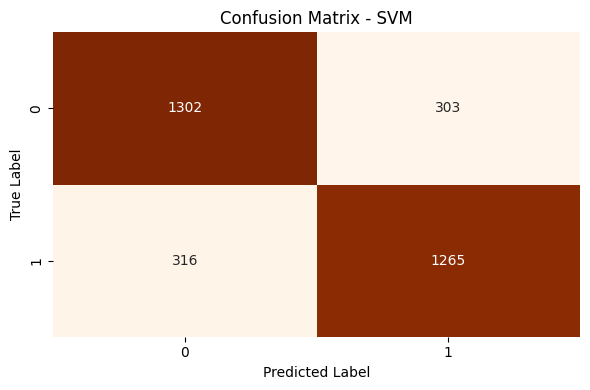

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1605
           1       0.71      0.69      0.70      1581

    accuracy                           0.70      3186
   macro avg       0.71      0.70      0.70      3186
weighted avg       0.71      0.70      0.70      3186



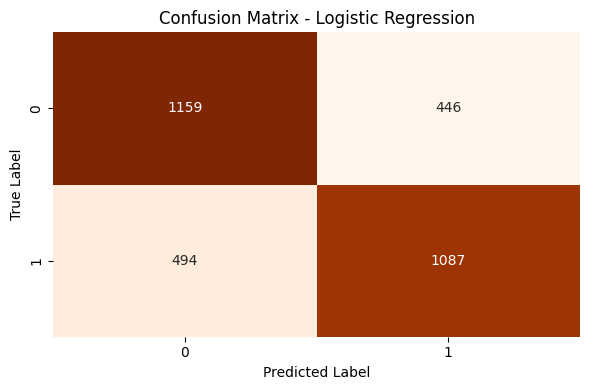

Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1605
           1       0.87      0.98      0.92      1581

    accuracy                           0.92      3186
   macro avg       0.92      0.92      0.91      3186
weighted avg       0.92      0.92      0.91      3186



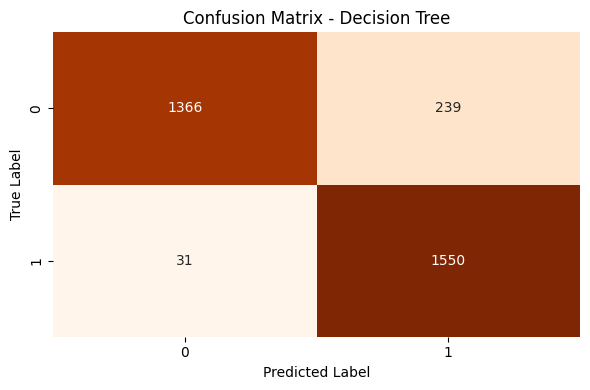

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1605
           1       0.92      0.98      0.95      1581

    accuracy                           0.95      3186
   macro avg       0.95      0.95      0.95      3186
weighted avg       0.95      0.95      0.95      3186



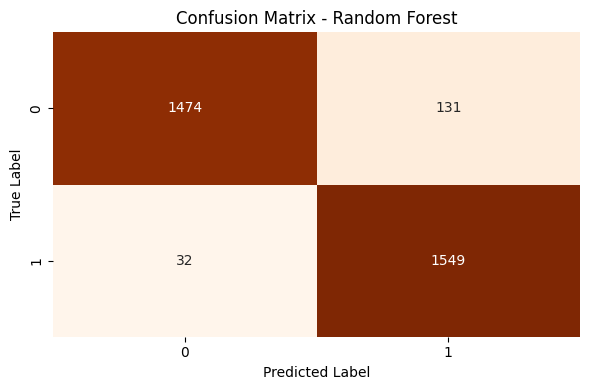

In [44]:
# SVM - Classification report and confusion matrix
print("SVM - Classification Report:")
print(classification_report(y_test, svm_predictions))
plot_confusion_matrix(y_test, svm_predictions, "SVM")

# Logistic Regression - Classification report and confusion matrix
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, log_reg_predictions))
plot_confusion_matrix(y_test, log_reg_predictions, "Logistic Regression")

# Decision Tree - Classification report and confusion matrix
print("Decision Tree - Classification Report:")
print(classification_report(y_test, decision_tree_predictions))
plot_confusion_matrix(y_test, decision_tree_predictions, "Decision Tree")

# Random Forest - Classification report and confusion matrix
print("Random Forest - Classification Report:")
print(classification_report(y_test, random_forest_predictions))
plot_confusion_matrix(y_test, random_forest_predictions, "Random Forest")

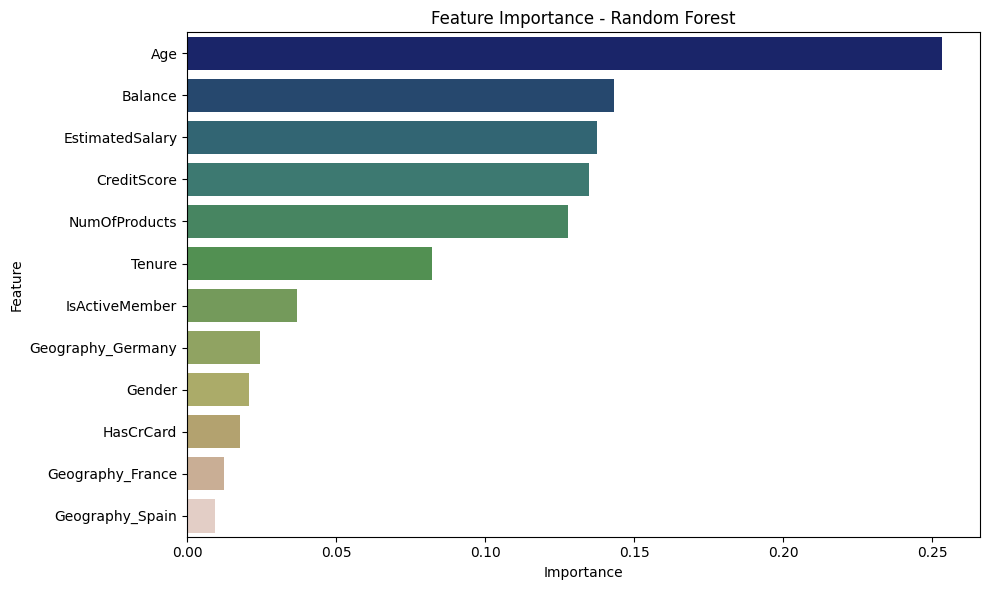

In [45]:
# Get feature importances from the Random Forest model
importances = random_forest_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='gist_earth')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()